In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [3]:
file_train_github = './dataset/train.csv'
file_train_kaggle = '/kaggle/input/playground-series-s4e1/train.csv'
file_test_github = './dataset/test.csv'
file_test_kaggle = '/kaggle/input/playground-series-s4e1/test.csv'

try:
    orig_train = pd.read_csv(file_train_github)
    orig_test = pd.read_csv(file_test_github)
except:
    orig_train = pd.read_csv(file_train_kaggle)
    orig_test = pd.read_csv(file_test_kaggle)

df = orig_train.copy()
df_test = orig_test.copy()
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.shape

(165034, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
df.duplicated(keep=False).sum()

0

In [7]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
                  ..
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Length: 14, dtype: int64

In [8]:
df.CustomerId.nunique()

23221

In [9]:
df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [11]:
numerical_cols = df.select_dtypes('number').columns.drop('Exited')
categorical_cols = df.select_dtypes(exclude='number')

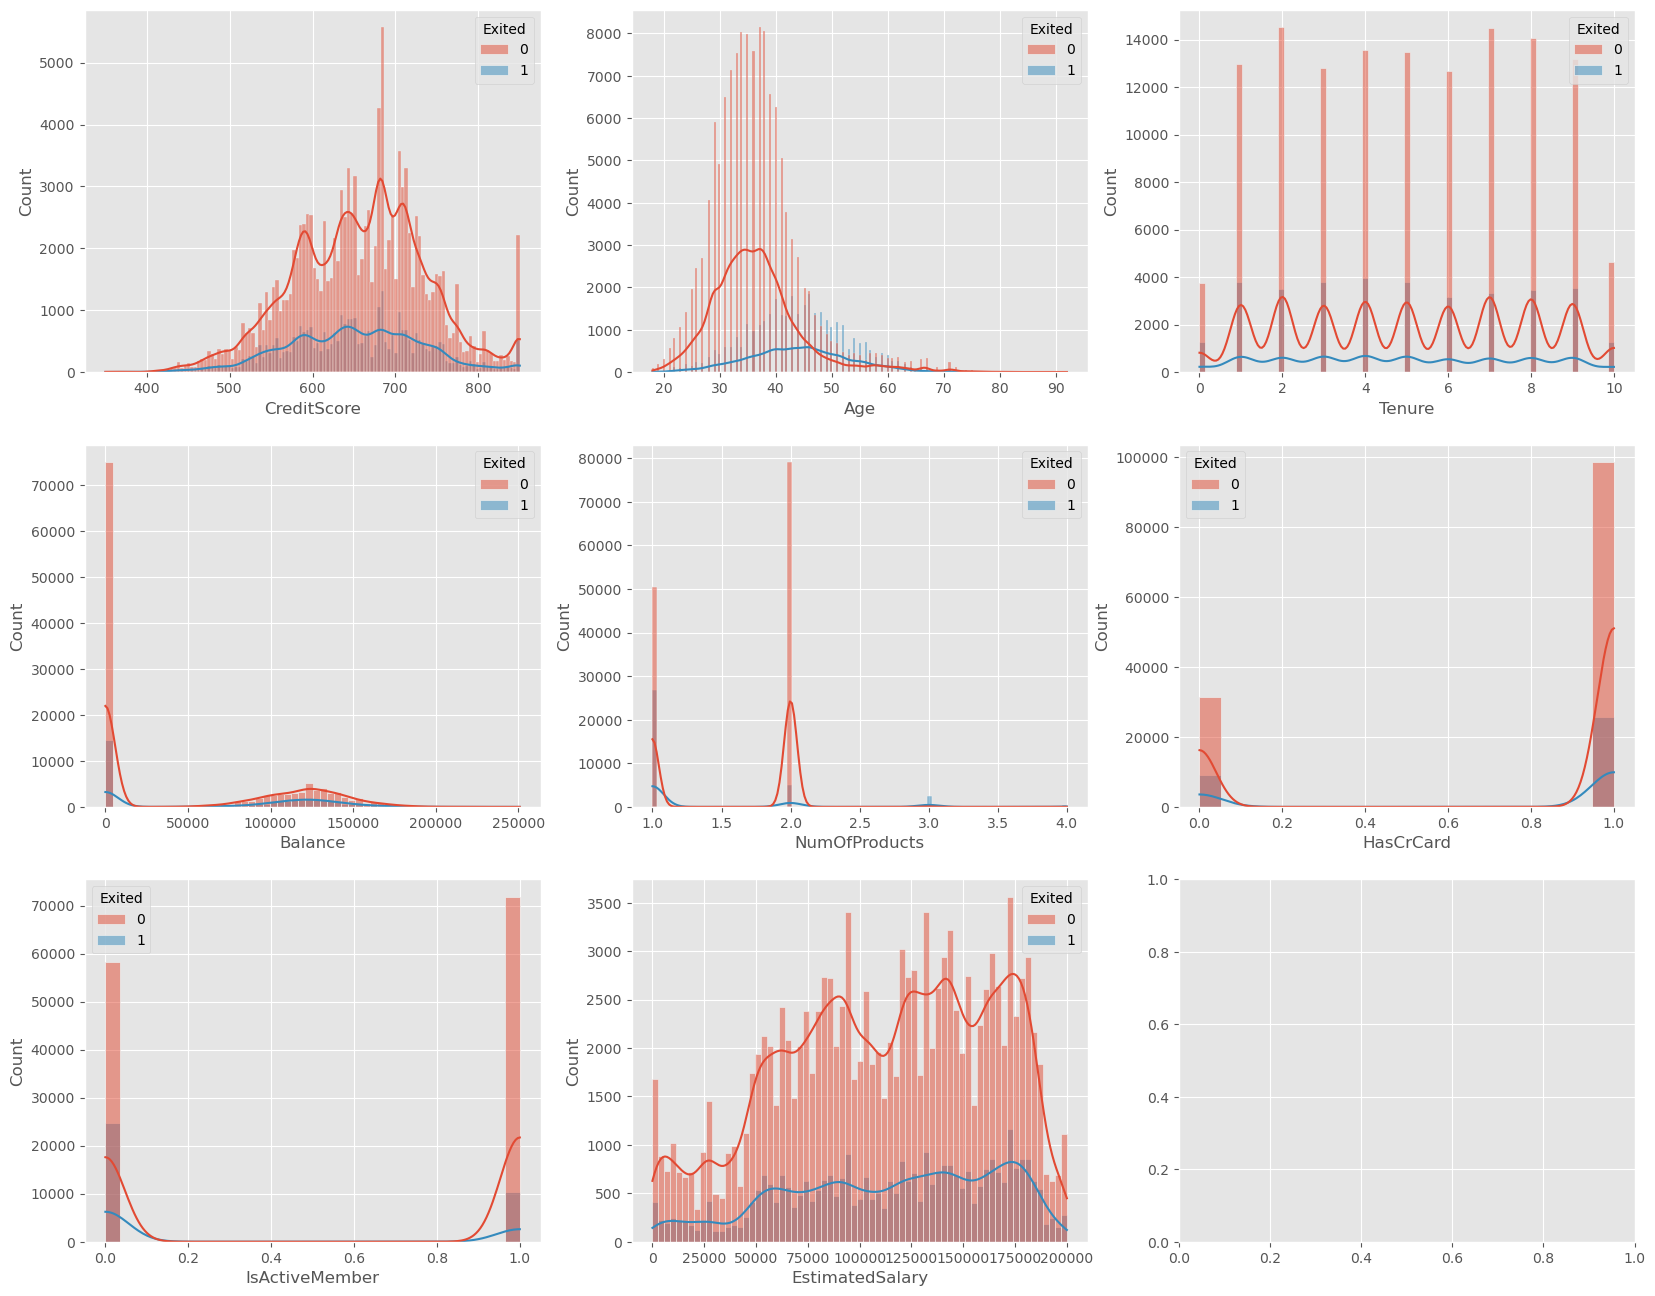

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(20, 16))

for index, col_name in enumerate(numerical_cols):
    sns.histplot(ax=ax.flatten()[index], data=df, x=col_name, hue='Exited', kde=True)

In [13]:
df.CreditScore.skew()

-0.059291219678312086

In [14]:
df.loc[:, ['Geography', 'Gender', 'Exited']]

,Geography,Gender,Exited
0,France,Male,0
1,France,Male,0
2,France,Male,0
3,France,Male,0
4,Spain,Male,0
...,...,...,...
165029,Spain,Female,0
165030,France,Male,0
165031,France,Male,0
165032,Spain,Female,0


In [15]:
numerical_cols_pairplot = df.select_dtypes('number')
numerical_cols_pairplot

# sns.pairplot(data=numerical_cols_pairplot, corner=True, hue='Exited')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0


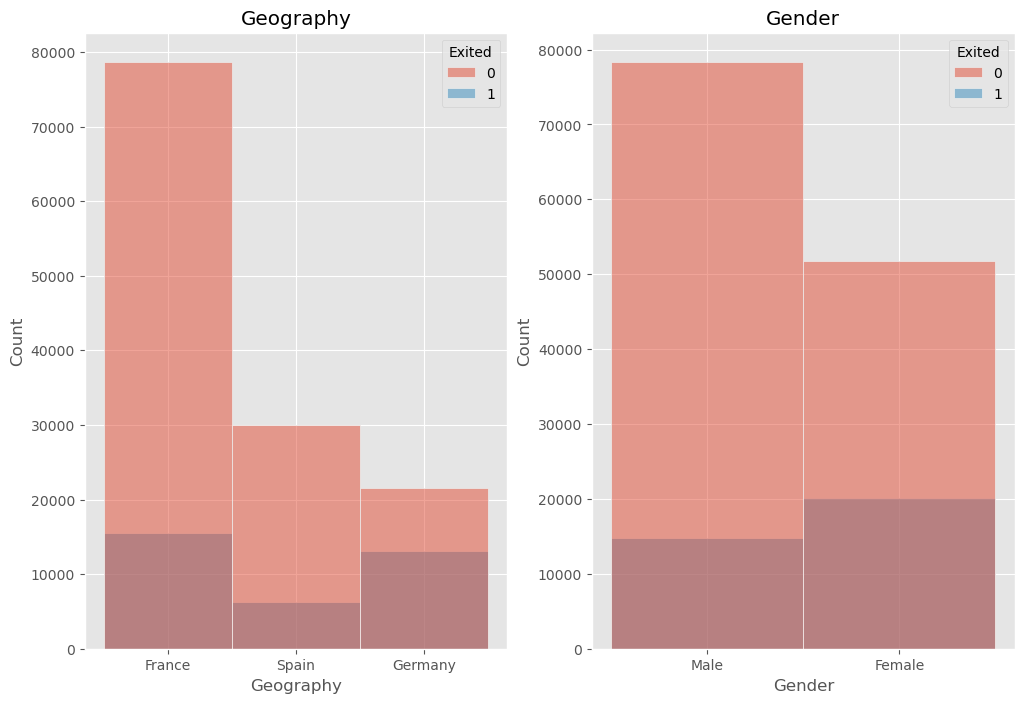

In [16]:
categorical_cols_pairplot = df.loc[:, ['Geography', 'Gender', 'Exited']]
categorical_cols_pairplot

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for index, col_name in enumerate(['Geography', 'Gender']):
    count = df[col_name].value_counts()
    sns.histplot(data=df, x=col_name, hue='Exited', ax=ax.flatten()[index])
    ax.flatten()[index].set_title(col_name)

In [17]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [18]:
robust_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
surname_cols = ['Surname']
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
pass_through = ['NumOfProducts']

In [19]:
X_train = orig_train.drop(['id', 'CustomerId', 'Exited'], axis=1)
y_train = orig_train['Exited']
X_test = df_test.drop(['id', 'CustomerId'], axis=1)

In [20]:
ct = ColumnTransformer([
    ('robust_scaler', RobustScaler(), robust_cols),
    ('surname_one_hot', OneHotEncoder(sparse_output=True, handle_unknown='ignore', min_frequency=400), surname_cols),
    ('one_hot_encode', OneHotEncoder(sparse_output=True, handle_unknown='ignore'), cat_cols),
    ('not_transformed', 'passthrough', pass_through)
])

In [21]:
pipe_rf = Pipeline([
    ('preprocessing', ct),
    ('model', RandomForestClassifier(n_estimators=500, min_samples_split=2, random_state=0, ))
])

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'EstimatedSalary']),
                                                 ('surname_one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=400),
                                                  ['Surname']),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender',
                                                   'HasCrCard',
                                                   'IsActiveMember']),
                                                 ('not_transformed',
                                                  'passthrough',
                                                  ['NumOfProducts'])])),
                ('model',
                 RandomForestClassifier(n_estimators=500, random_state=0))])

In [22]:
prediction_rf = pipe_rf.predict_proba(X_test)

In [23]:
submission_rf = pd.DataFrame(data=prediction_rf[:, 1], columns=[
                          'Exited'], index=orig_test['id'])
submission_rf

,Exited
id,
165034,0.020
165035,0.858
165036,0.002
165037,0.262
165038,0.414
...,...
275052,0.052
275053,0.092
275054,0.004


In [24]:
submission_rf.to_csv('submission_rf2.csv')

In [25]:
xgbooster = XGBClassifier()

In [26]:
pipe_xgb = Pipeline([
    ('preprocessing', ct),
    ('model', xgbooster)
])

In [39]:
# param = {
#     "model__n_estimators": [400],
#     "model__max_depth": [3, 4, 5, 7],
#     "model__learning_rate": [0.1, 0.01, 0.05],
#     "model__gamma": [0, 0.25, 1],
#     "model__reg_lambda": [0, 1, 10],
#     "model__scale_pos_weight": [1, 3, 5],
#     "model__subsample": [0.8], 
#     "model__colsample_bytree": [0.5],
# }

In [45]:
param = {
    "model__n_estimators": [350, 400, 450],
    "model__max_depth": [5, 6, 7],
    "model__learning_rate": [0.05],
    "model__gamma": [0.04, 0.05, 0.06, 0.07],
    "model__reg_lambda": [3,4,5],
    "model__scale_pos_weight": [2],
    "model__subsample": [0.8], 
    "model__colsample_bytree": [0.5],
}

In [46]:
grid_search_cv = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

In [47]:
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('robust_scaler',
                                                                         RobustScaler(),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'EstimatedSalary']),
                                                                        ('surname_one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       min_frequency=400),
                                                                         ['Surname']),
                                                                        ('one_hot_encode',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Geography',
                                                                          'Gende...
                                                      n_estimators=400,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.5],
                         'model__gamma': [0.04, 0.05, 0.06, 0.07],
                         'model__learning_rate': [0.05],
                         'model__max_depth': [5, 6, 7],
                         'model__n_estimators': [350, 400, 450],
                         'model__reg_lambda': [3, 4, 5],
                         'model__scale_pos_weight': [2],
                         'model__subsample': [0.8]},
             scoring='roc_auc')

In [48]:
grid_search_cv.best_score_ 

0.8918957751639807

In [49]:
best_params_xgb = grid_search_cv.best_params_

In [50]:
best_params_xgb

{'model__colsample_bytree': 0.5,
 'model__gamma': 0.05,
 'model__learning_rate': 0.05,
 'model__max_depth': 6,
 'model__n_estimators': 400,
 'model__reg_lambda': 3,
 'model__scale_pos_weight': 2,
 'model__subsample': 0.8}

{'model__colsample_bytree': 0.5,
 'model__gamma': 0,
 'model__learning_rate': 0.05,
 'model__max_depth': 5,
 'model__n_estimators': 400,
 'model__reg_lambda': 1,
 'model__scale_pos_weight': 1,
 'model__subsample': 0.8}

{'model__colsample_bytree': 0.5,
 'model__gamma': 0.05,
 'model__learning_rate': 0.05,
 'model__max_depth': 6,
 'model__n_estimators': 400,
 'model__reg_lambda': 3,
 'model__scale_pos_weight': 2,
 'model__subsample': 0.8}

In [34]:
xgbooster_best = XGBClassifier(colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=6, n_estimators=400, reg_lambda=3, scale_pos_weight=2, subsample=0.8)

pipe_xgb = Pipeline([
    ('preprocessing', ct),
    ('model', xgbooster_best)
])

In [51]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'EstimatedSalary']),
                                                 ('surname_one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=400),
                                                  ['Surname']),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender',
                                                   'HasCrCard',
                                                   'IsActiveMemb...
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [52]:
prediction_xgb = pipe_xgb.predict_proba(X_test)

In [53]:
submission_xgb = pd.DataFrame(data=prediction_xgb[:, 1], columns=[
                          'Exited'], index=orig_test['id'])
submission_xgb

,Exited
id,
165034,0.020450
165035,0.812372
165036,0.026855
165037,0.233483
165038,0.367041
...,...
275052,0.033033
275053,0.131118
275054,0.013443


In [54]:
submission_xgb.to_csv('submission_xgb4.csv')

In [47]:
prediction_xgb_grid = grid_search_cv.predict_proba(X_test)

In [48]:
submission_xgb_grid = pd.DataFrame(data=prediction_xgb_grid[:, 1], columns=[
                          'Exited'], index=orig_test['id'])
submission_xgb_grid

,Exited
id,
165034,0.032050
165035,0.822183
165036,0.027997
165037,0.242866
165038,0.361525
...,...
275052,0.039632
275053,0.120293
275054,0.020266


In [50]:
submission_xgb_grid.to_csv('submission_xgb_grid.csv')